In [107]:

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from tqdm import tqdm

from simulation import PoissonNeuron, bins_spike, get_orientation, get_theta_time_series, get_bump
import constant as ct


# 1.1

100%|██████████| 9999/9999 [00:00<00:00, 18622.83it/s]


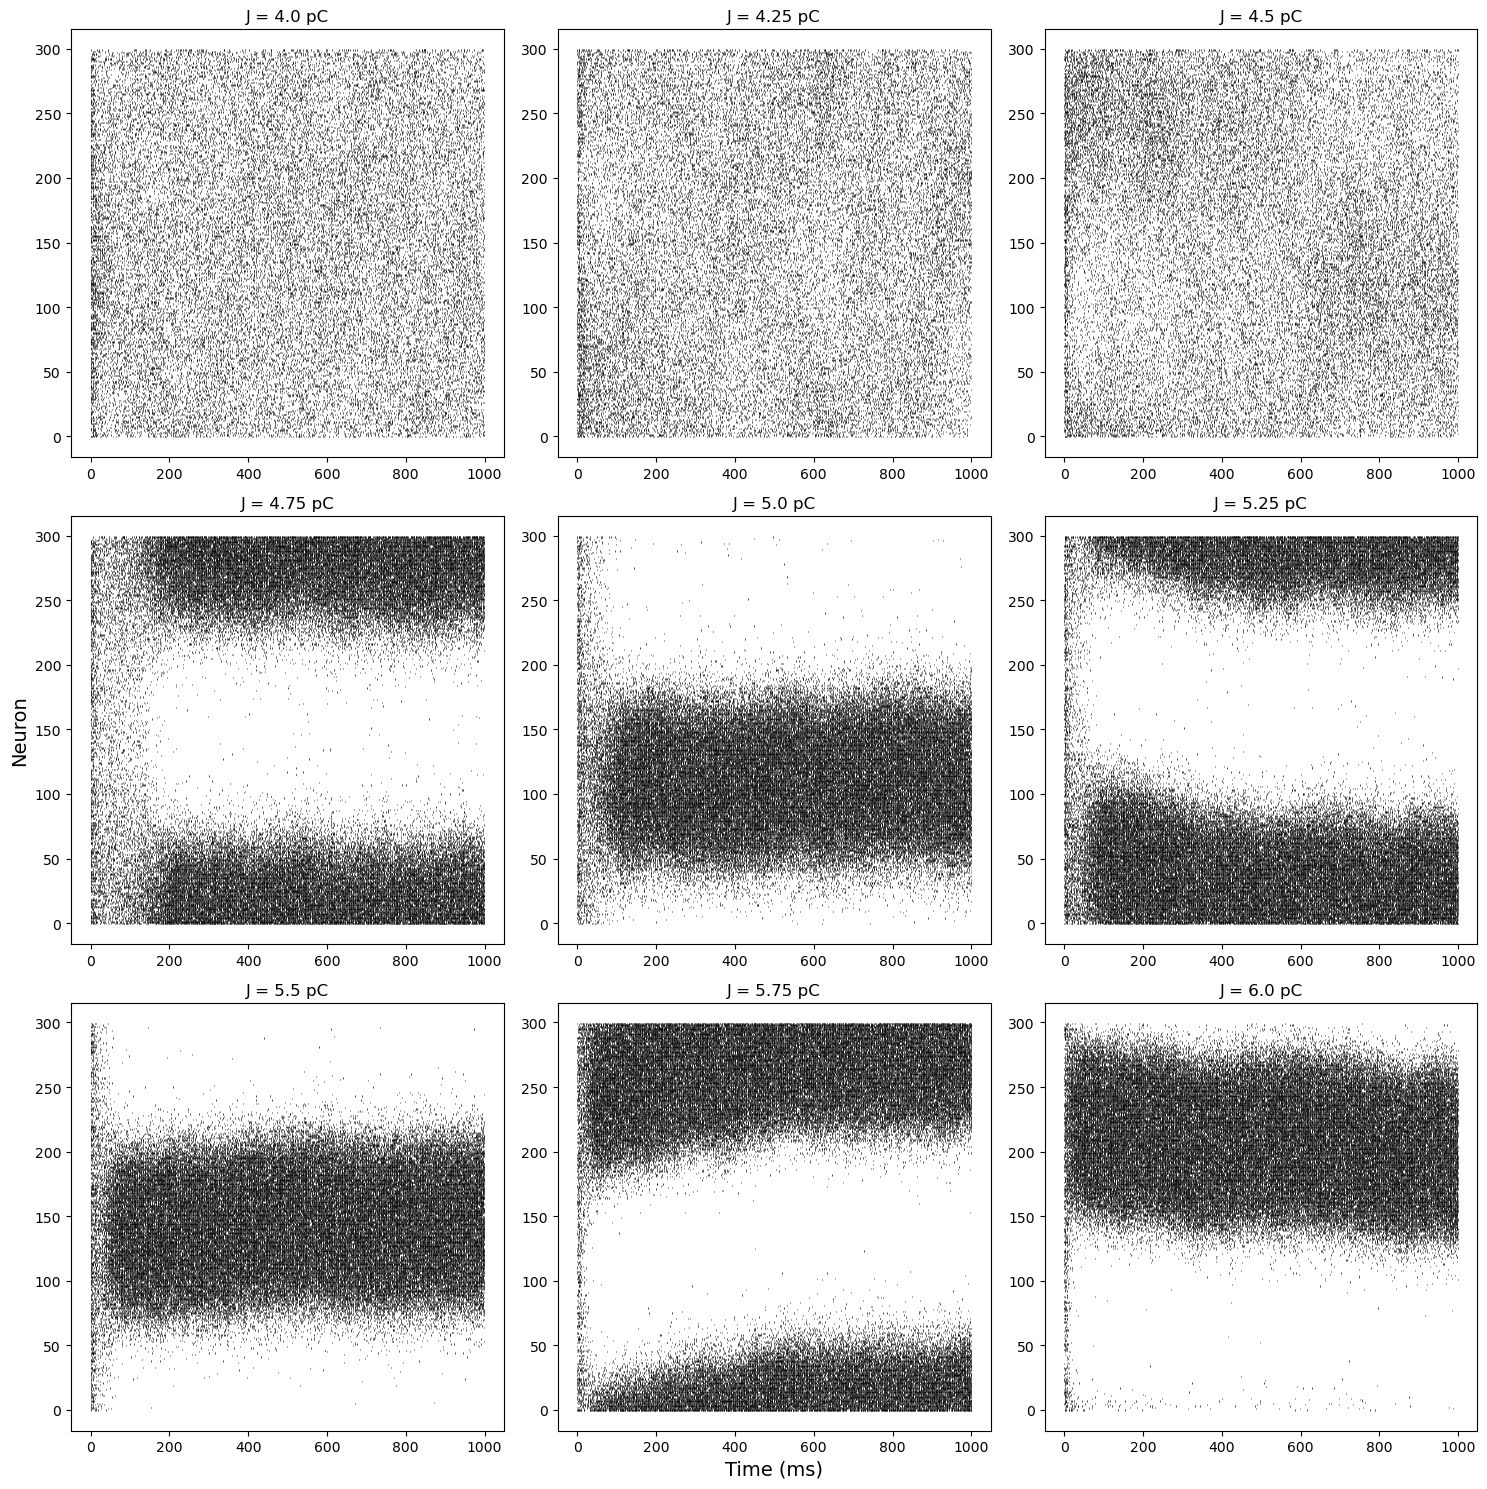

In [108]:
J_values = np.linspace(4, 6, 9)

fig, ax = plt.subplots(3, 3, figsize=(15, 15))
ax[2, 1].set_xlabel('Time (ms)', fontsize=14)
ax[1, 0].set_ylabel('Neuron', fontsize=14)

for i, J in enumerate(J_values):
    x, y = i//3, i%3
    network = PoissonNeuron(J=J)
    h,s = network.spike_simulation(input_fct=network.recurrent_interactions_input, initial_voltage=np.random.uniform(0, 1, ct.N))
    
    s = bins_spike(s, 1)
    spike_times = [np.where(s.T[i] !=0)[0] for i in range(ct.N)]
    ax[x, y].eventplot(spike_times, orientation='horizontal', linewidths=0.5, color='black')
    ax[x, y].set_title(f'J = {J} pC')

#plt.tight_layout()
#plt.savefig('./plots/1_1.png', dpi=600)
plt.show()

A jump is visible for J bigger than 4.75 pC

# 1.2

In [3]:
# print(get_orientation(np.array([0, 1,5,10]), 11)) # la consigne a changé je crois
# print(get_orientation(np.array([0,1,499,500,999]), 1000))

[ 16.36363636  49.09090909 180.         343.63636364]
[1.8000e-01 5.4000e-01 1.7982e+02 1.8018e+02 3.5982e+02]


In [127]:
J = 5
network = PoissonNeuron(J=J)
h,s = network.spike_simulation(input_fct=network.recurrent_interactions_input, initial_voltage=np.random.uniform(0, 1, ct.N))
s1 = bins_spike(s, 1)
s10 = bins_spike(s, 10)
# theta = get_theta_time_series(spikes=s)

100%|██████████| 9999/9999 [00:00<00:00, 17697.32it/s]


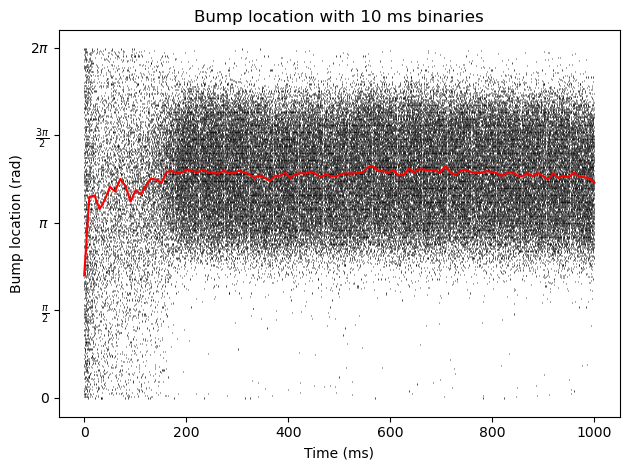

In [128]:
bump_location = get_bump(s10, N = ct.N)
spike_times = [np.where(s1.T[i] !=0)[0] for i in range(ct.N)]
plt.eventplot(spike_times, orientation='horizontal', linewidths=0.5, color='black')
plt.plot(np.linspace(0, 1000, len(bump_location), endpoint=True), ct.N*np.array(bump_location)/(2*np.pi), color='red') # with 10 ms binaries
plt.title('Bump location with 10 ms binaries')
plt.xlabel('Time (ms)')
plt.ylabel('Bump location (rad)')
plt.yticks(np.linspace(0,ct.N,5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])

#plt.tight_layout()
#plt.savefig('./plots/1_2.png', dpi=600)
plt.show()


# 1.3

In [104]:
N = 5000
delta_t = 0.05
tau = 5
network = PoissonNeuron(N=N, J=J, tau=tau, delta_t=delta_t)
h,s = network.spike_simulation(input_fct=network.recurrent_interactions_input, initial_voltage=np.random.uniform(0, 1, N))
s1 = bins_spike(s, 1, delta_t=delta_t, N=N)
s10 = bins_spike(s, 10, N=N)

100%|██████████| 19999/19999 [00:07<00:00, 2807.84it/s]


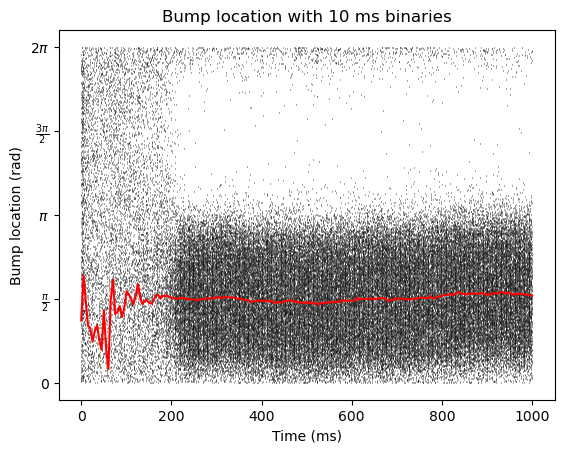

In [105]:
bump_location = get_bump(s10, N = N)
spike_times = [np.where(s1.T[i] !=0)[0] for i in range(N)]
plt.eventplot(spike_times, orientation='horizontal', linewidths=0.5, color='black')
plt.plot(np.linspace(0, 1000, len(bump_location), endpoint=True), N*np.array(bump_location)/(2*np.pi), color='red')
plt.title('Bump location with 10 ms binaries')
plt.xlabel('Time (ms)') # with 10 ms binaries
plt.ylabel('Bump location (rad)')
plt.yticks(np.linspace(0,N,5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.show()

# 1.4

100%|██████████| 9999/9999 [00:00<00:00, 16243.52it/s]


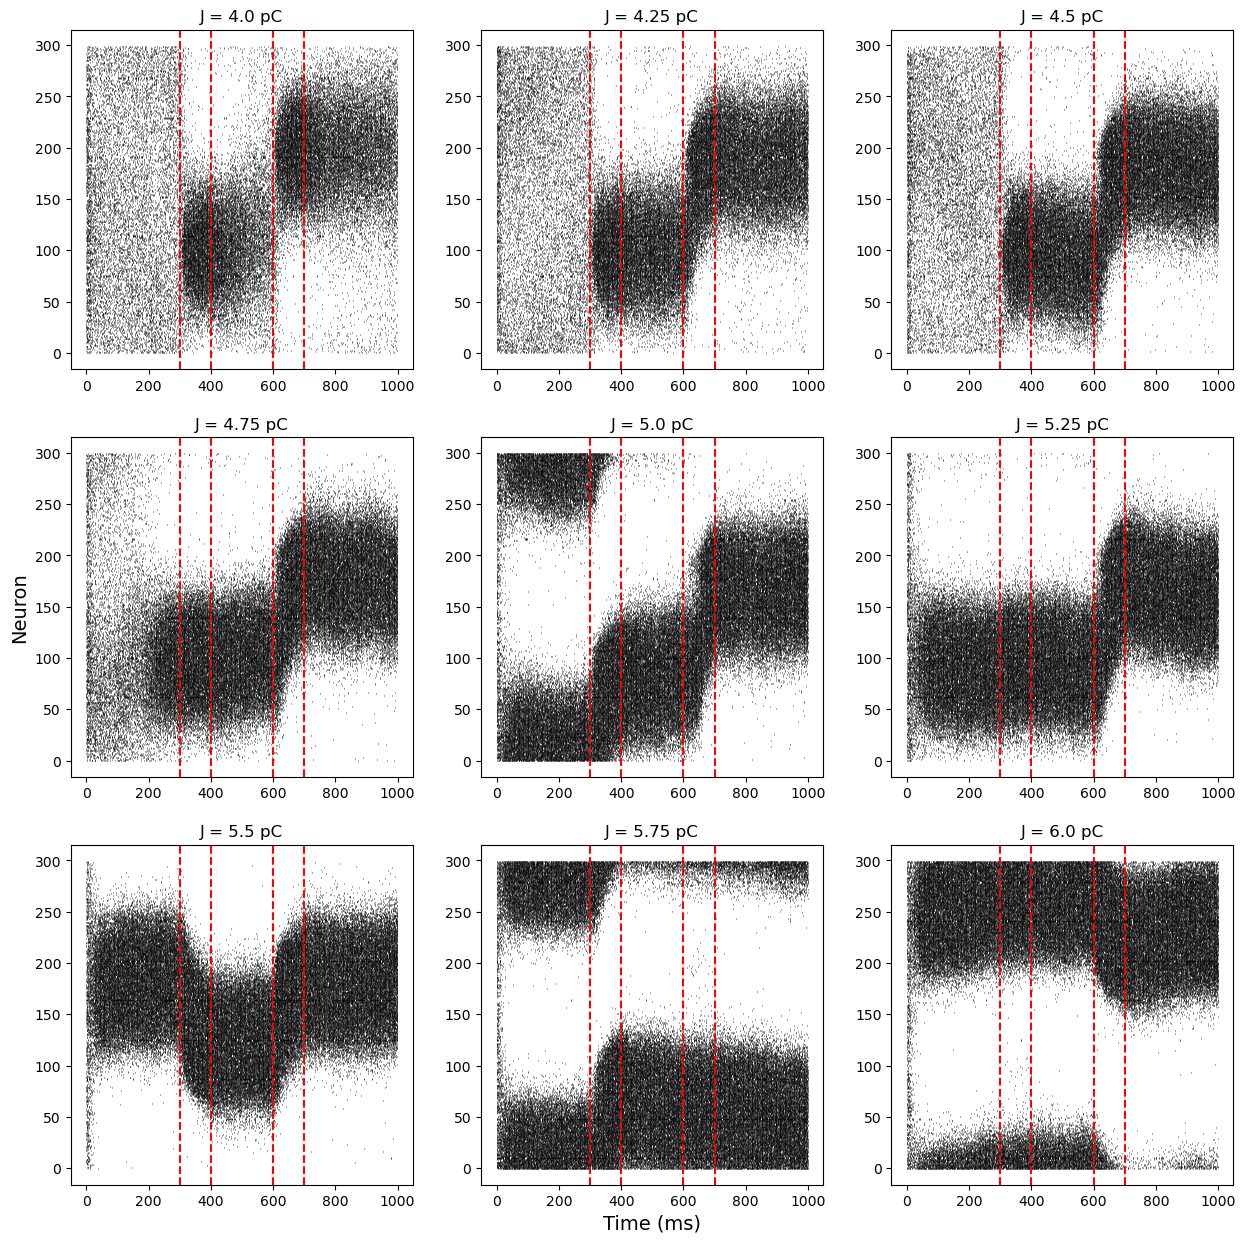

In [106]:
J_values = np.linspace(4, 6, 9)

fig, ax = plt.subplots(3, 3, figsize=(15, 15))
ax[2, 1].set_xlabel('Time (ms)', fontsize=14)
ax[1, 0].set_ylabel('Neuron', fontsize=14)

for i, J in enumerate(J_values):
    x1, y1 = i//3, i%3

    network = PoissonNeuron(J=J, I_ext=True) # with external input
    _, spike_ext_current = network.spike_simulation(input_fct=network.recurrent_interactions_input, initial_voltage=np.random.uniform(0, 1, ct.N))
    
    spike_ext_current = bins_spike(spike_ext_current, 1)
    spike_times = [np.where(spike_ext_current.T[i] !=0)[0] for i in range(ct.N)]
    ax[x1, y1].eventplot(spike_times, orientation='horizontal', color="black", linewidth=0.5)
    [ax[x1, y1].axvline(x=x, color='red', linestyle='--') for x in [300, 400,600,700]]
    ax[x1, y1].set_title(f'J = {J} pC')
plt.show()    

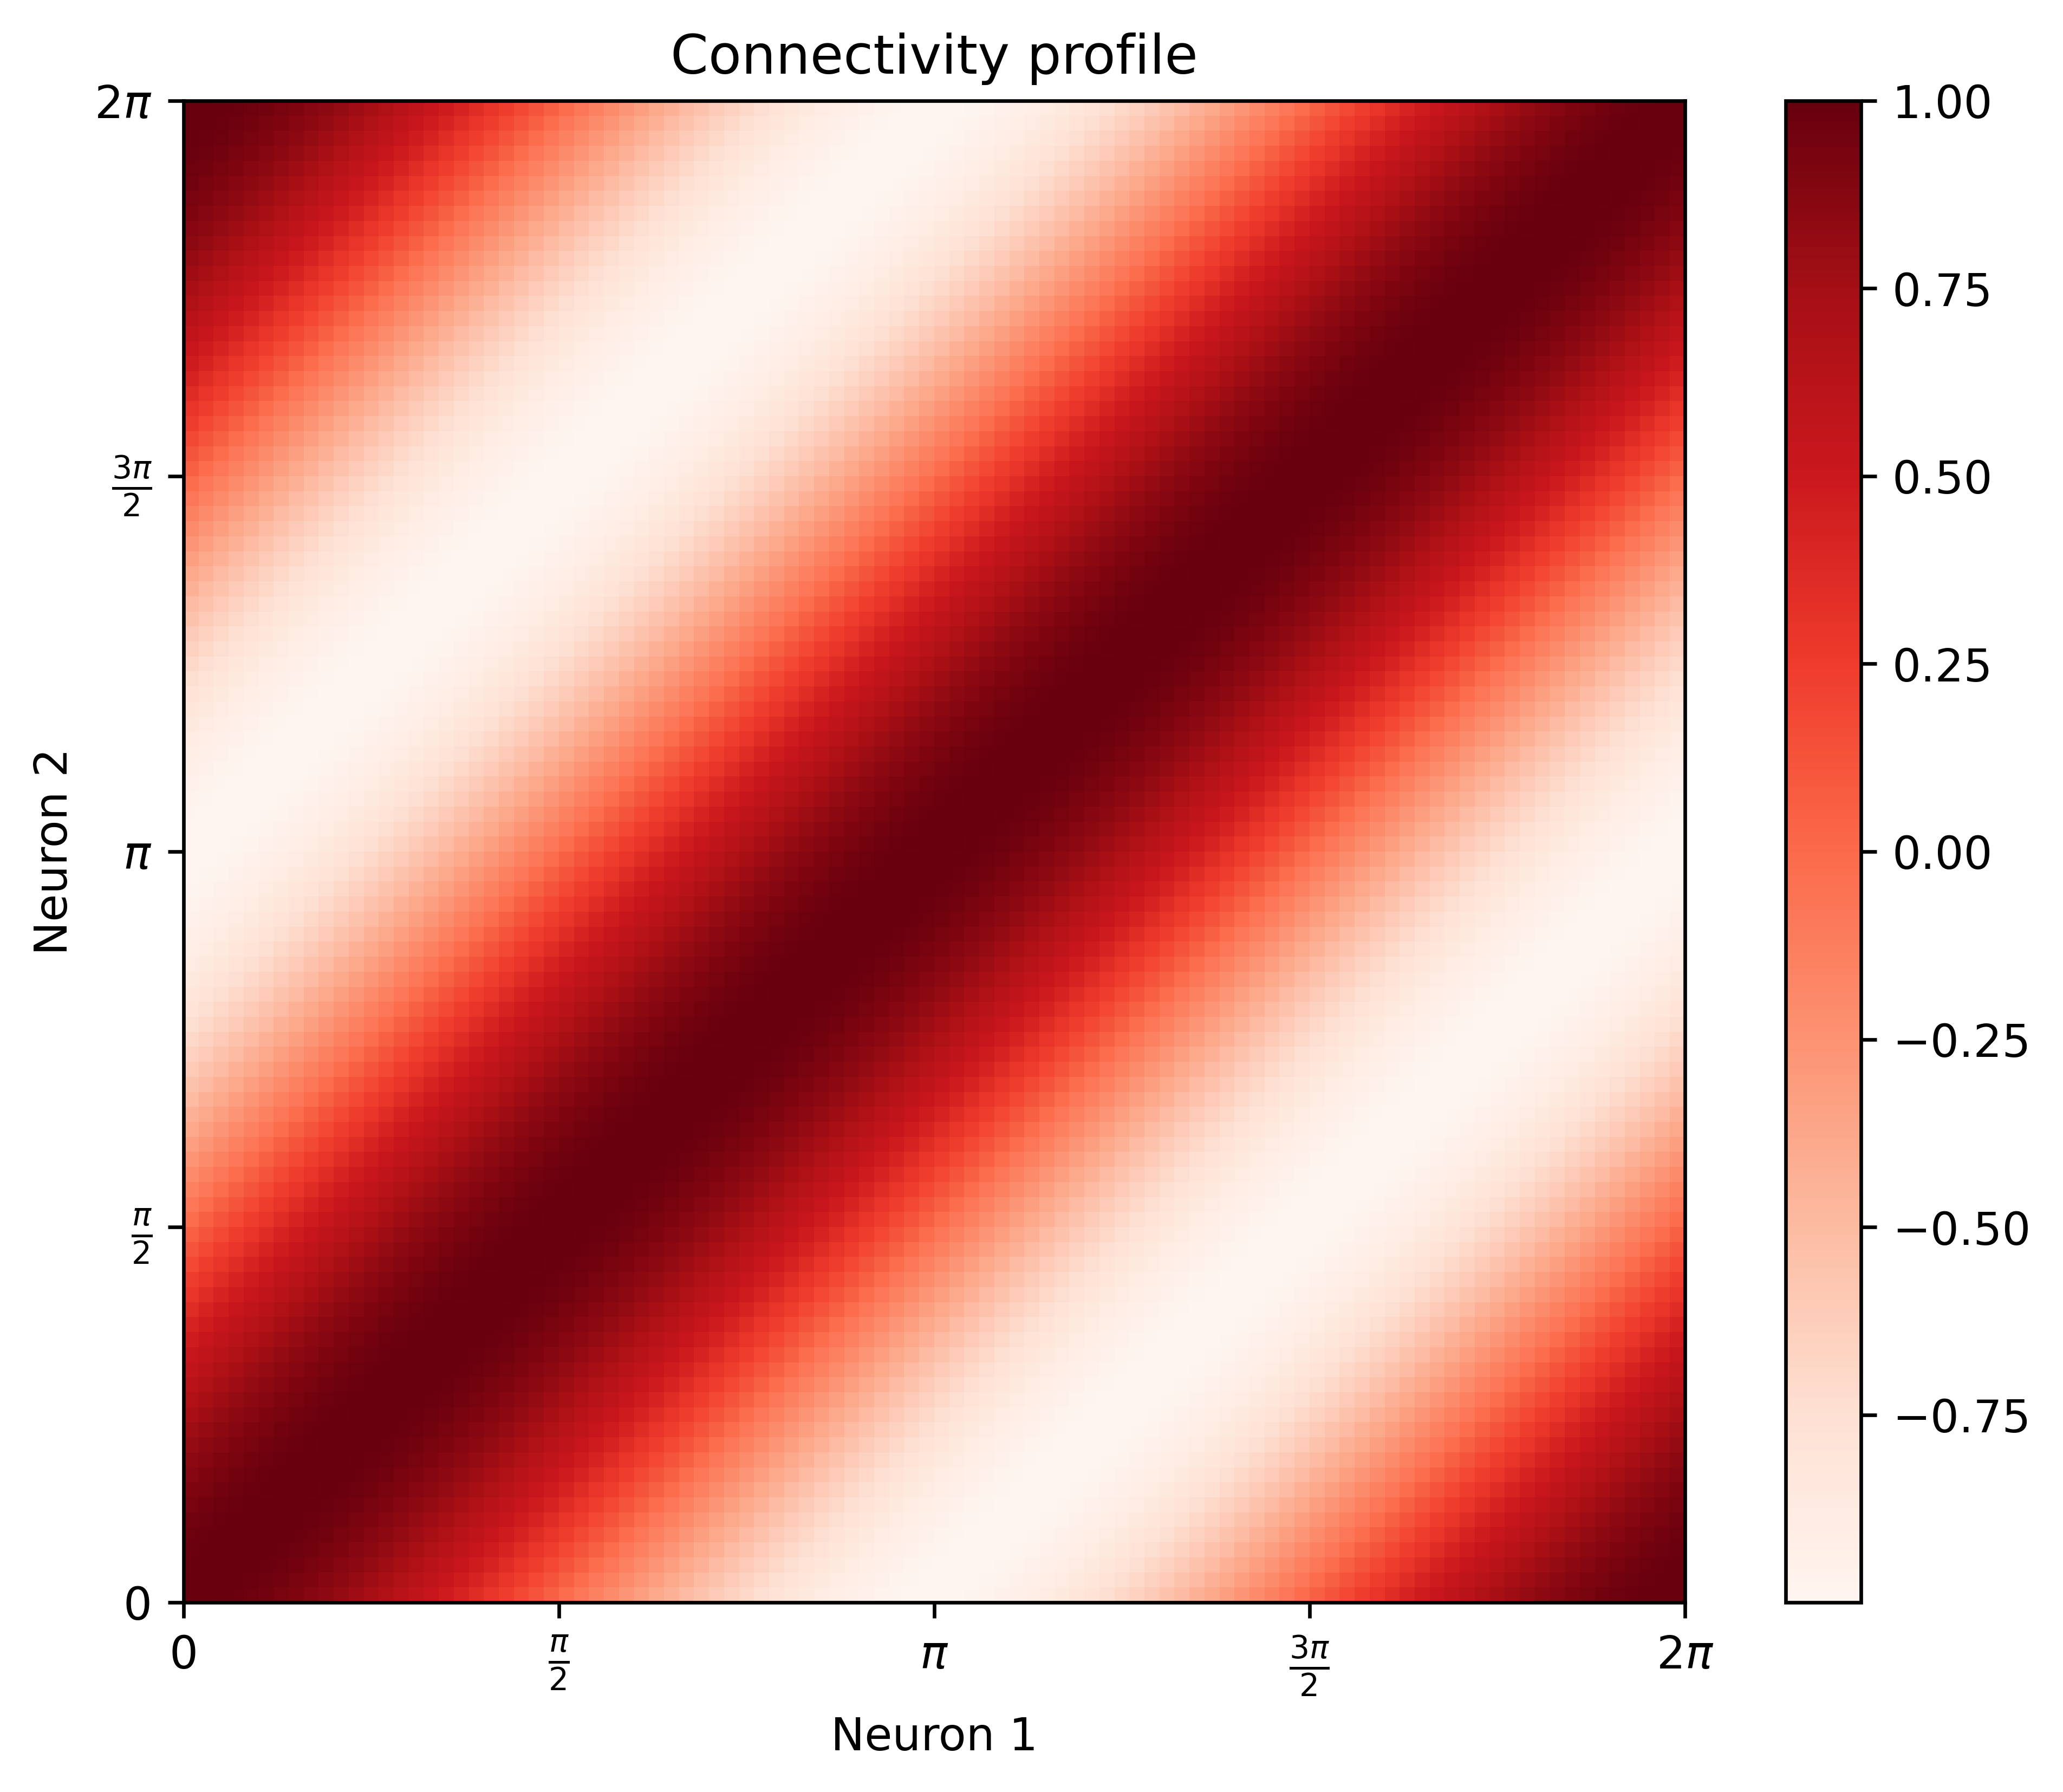

In [155]:
# connectivity profile

phase = 0
x = np.linspace(0, 2*np.pi, 100).reshape(-1, 1)
w = np.cos(x-phase-x.T)

plt.figure(figsize=(8, 6), dpi=600)
plt.imshow(w, cmap='Reds', extent=[0, 2*np.pi, 0, 2*np.pi], origin='lower')
plt.xlabel('Neuron 1')
plt.ylabel('Neuron 2')
plt.title('Connectivity profile')
plt.xticks(np.linspace(0,2*np.pi,5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.yticks(np.linspace(0,2*np.pi,5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.colorbar()

Attract neuron at proximity and inhibit neurons far away

# 1.5

In [165]:
phi_values = [0, np.pi/32, np.pi/16, np.pi/8]
string_phi = ['0', r'$\frac{\pi}{32}$', r'$\frac{\pi}{16}$', r'$\frac{\pi}{8}$']

fig, ax = plt.subplots(2, 2, figsize=(12, 12), dpi=600)
fig.supxlabel('Time (ms)', fontsize=14)
fig.supylabel('Neuron', fontsize=14)

for i, phi in enumerate(phi_values):
    x, y = i//2, i%2
    network = PoissonNeuron(phi=phi)
    h,s = network.spike_simulation(input_fct=network.recurrent_interactions_input, initial_voltage=np.random.uniform(0, 1, ct.N))
    
    s = bins_spike(s, 1)
    spike_times = [np.where(s.T[i] !=0)[0] for i in range(ct.N)]
    ax[x, y].eventplot(spike_times, orientation='horizontal', color="black", linewidth=0.5)
    ax[x, y].set_title(r'$\varphi$ = ' + string_phi[i] + ' rad')

    
plt.tight_layout()
plt.show()
    

100%|██████████| 9999/9999 [00:00<00:00, 18997.38it/s]


With the original connectivity $( w(x_i, x_j))$, the network generates a bump pattern that is symmetric.

However, when the connectivity is given by $( w(x_i - \varphi, x_j))$, a phase shift occurs in the connectivity pattern. This means that the activity bump will also exhibit a phase shift by an amount equal to $( \varphi )$. We can expect a shift in the behavior of the bump due to this phase difference. 

## 1.6

J1 = 1e-05 and sigma = 0.1


100%|██████████| 9999/9999 [00:15<00:00, 645.48it/s]


J1 = 0.0001 and sigma = 0.1


100%|██████████| 9999/9999 [00:17<00:00, 567.59it/s]


J1 = 0.001 and sigma = 0.1


100%|██████████| 9999/9999 [00:18<00:00, 526.68it/s]


J1 = 1e-05 and sigma = 1


100%|██████████| 9999/9999 [00:11<00:00, 883.87it/s]


J1 = 0.0001 and sigma = 1


100%|██████████| 9999/9999 [00:11<00:00, 895.00it/s]


J1 = 0.001 and sigma = 1


100%|██████████| 9999/9999 [00:10<00:00, 977.24it/s] 


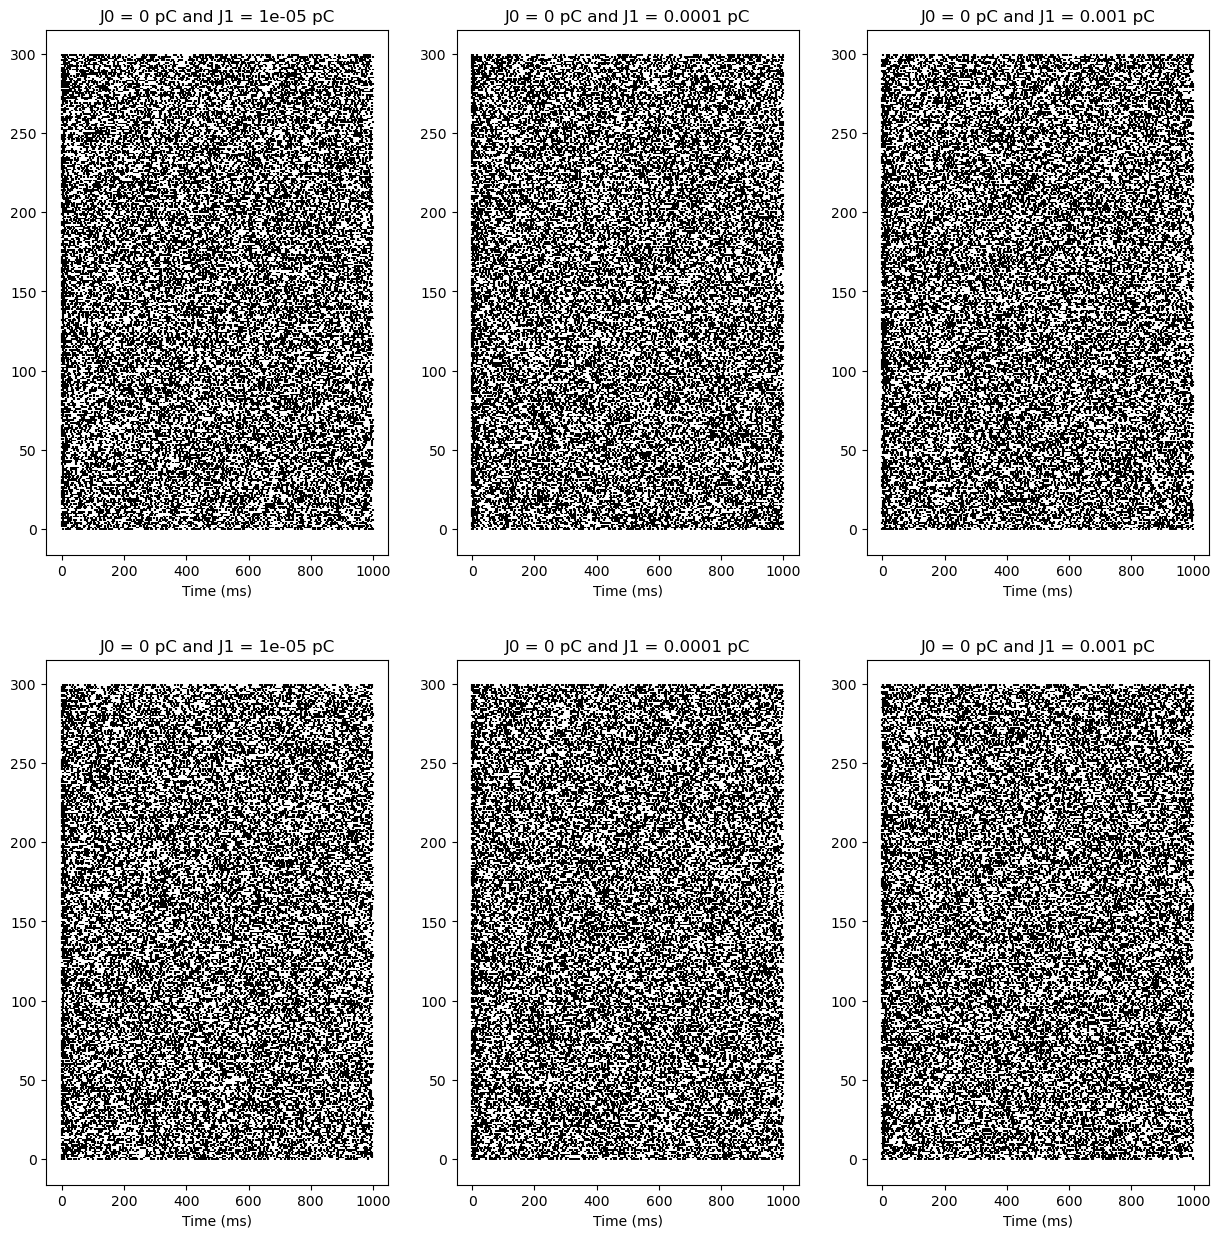

In [172]:
J1_values = [1e-5, 1e-4, 1e-3]
J0 =  0
sigma_values = [1e-1, 1]

fig, ax = plt.subplots(len(sigma_values), len(J1_values), figsize=(15, 15))

for i, sigma_w in enumerate(sigma_values):
    for j, J1 in enumerate(J1_values):
        print(f'J1 = {J1} and sigma = {sigma_w}')
        network = PoissonNeuron(J0=J0, J1=J1, sigma_w=sigma_w)
        h,s = network.spike_simulation(input_fct=network.line_input, initial_voltage=np.random.uniform(0, 1, ct.N))
        
        s = bins_spike(s, 1)
        spike_times = [np.where(s.T[i] !=0)[0] for i in range(ct.N)]
        ax[i,j].eventplot(spike_times, orientation='horizontal', color="black")
        ax[i,j].set_title(f'J0 = {J0} pC and J1 = {J1} pC')
        ax[i,j].set_xlabel('Time (ms)')
plt.show()